## Fertilizer Prediction Model

In [1]:
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('../data/Fertilizer Prediction.csv')
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [3]:
# X = df[['Nitrogen', 'Phosphorous', 'Potassium', 'Fertilizer Name']]
X = df[['Nitrogen', 'Phosphorous', 'Fertilizer Name']]
y = X.pop('Fertilizer Name')
X = pd.get_dummies(X).astype(int)
# encoder = LabelEncoder()
# y = encoder.fit_transform(y)
X

,Nitrogen,Phosphorous
0,37,0
1,12,36
2,7,30
3,22,20
4,35,0
...,...,...
94,24,19
95,4,17
96,39,0
97,15,41


In [4]:
X.describe()

,Nitrogen,Phosphorous
count,99.000000,99.000000
mean,18.909091,18.606061
std,11.599693,13.476978
min,4.000000,0.000000
25%,10.000000,9.000000
50%,13.000000,19.000000
75%,24.000000,30.000000
max,42.000000,42.000000


In [5]:
X_mod = X*3 # adjust for unit discrepancy
X_mod

,Nitrogen,Phosphorous
0,111,0
1,36,108
2,21,90
3,66,60
4,105,0
...,...,...
94,72,57
95,12,51
96,117,0
97,45,123


In [6]:
# model inputs: Nitrogen levels, Phosphorus levels
X_mod.describe()

,Nitrogen,Phosphorous
count,99.000000,99.000000
mean,56.727273,55.818182
std,34.799079,40.430935
min,12.000000,0.000000
25%,30.000000,27.000000
50%,39.000000,57.000000
75%,72.000000,90.000000
max,126.000000,126.000000


Accuracy: 0.8666666666666667
Macro-averaged Precision: 0.761904761904762
Macro-averaged Recall: 0.6904761904761905


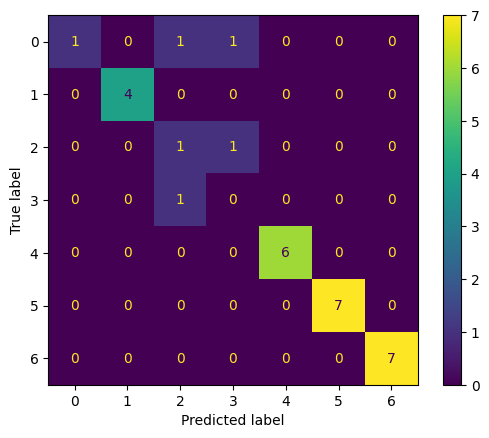

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.3, random_state=42)

# Instantiate KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)
# Make predictions on the test set
pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the KNN classifier
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
# Calculate macro-averaged precision
macro_precision = metrics.precision_score(y_test, pred, average='macro')

# Calculate macro-averaged recall
macro_recall = metrics.recall_score(y_test, pred, average='macro')

print("Macro-averaged Precision:", macro_precision)
print("Macro-averaged Recall:", macro_recall)
confusion_matrix2 = metrics.confusion_matrix(y_test, pred)

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2)

cm_display2.plot()
plt.show()

In [14]:
len(X_train)

69

0.9333333333333333
Macro-averaged Precision: 0.761904761904762
Macro-averaged Recall: 0.6904761904761905


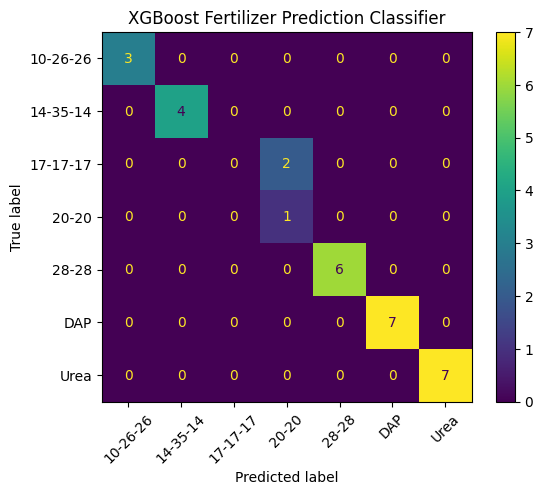

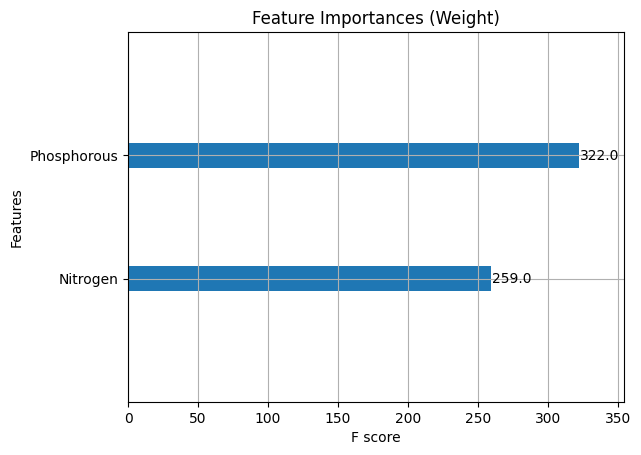

In [10]:
encoder = LabelEncoder()
en_y_train = encoder.fit_transform(y_train)
en_y_test = encoder.fit_transform(y_test)
xgb_classifier3 = XGBClassifier(objective='multi:softmax')

xgb_classifier3.fit(X_train, en_y_train)
pred2 = xgb_classifier3.predict(X_test)
print(metrics.accuracy_score(en_y_test, pred2))
# Calculate macro-averaged precision
macro_precision = metrics.precision_score(y_test, pred, average='macro')

# Calculate macro-averaged recall
macro_recall = metrics.recall_score(y_test, pred, average='macro')

print("Macro-averaged Precision:", macro_precision)
print("Macro-averaged Recall:", macro_recall)
confusion_matrix2 = metrics.confusion_matrix(en_y_test, pred2)
class_labels = sorted(y.unique())

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels=class_labels)

cm_display2.plot()
plt.title('XGBoost Fertilizer Prediction Classifier')
plt.xticks(rotation=45)
plt.show()
xgb.plot_importance(xgb_classifier3, importance_type='weight', max_num_features=10)
plt.title('Feature Importances (Weight)')
plt.show()

In [125]:
joblib.dump(knn_classifier, './fertilizer_prediction_model.pkl')

['./fertilizer_prediction_model.pkl']

In [126]:
pred

array(['28-28', '17-17-17', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '17-17-17', 'Urea', '14-35-14', '28-28',
       '20-20', '20-20', 'DAP', '14-35-14', '14-35-14', 'Urea',
       '17-17-17', 'DAP'], dtype=object)

In [124]:
y.unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [76]:
original_labels = encoder.inverse_transform(pred2)
print(pred2)
original_labels

[4 3 0 6 5 4 6 4 5 6 5 4 4 1 5 6 5 6 0 6 1 4 0 3 5 1 1 6 3 5]


array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', '20-20', 'DAP', '14-35-14', '14-35-14', 'Urea',
       '20-20', 'DAP'], dtype=object)

In [128]:
original_labels1 = encoder.inverse_transform(en_y_test)
print(en_y_test)
original_labels1

[4 3 0 6 5 4 6 4 5 6 5 4 4 1 5 6 5 6 0 6 1 4 0 2 5 1 1 6 2 5]


array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', '17-17-17', 'DAP', '14-35-14', '14-35-14', 'Urea',
       '17-17-17', 'DAP'], dtype=object)

In [129]:
for i,j in zip(en_y_test, original_labels1):
    print(i, j)

4 28-28
3 20-20
0 10-26-26
6 Urea
5 DAP
4 28-28
6 Urea
4 28-28
5 DAP
6 Urea
5 DAP
4 28-28
4 28-28
1 14-35-14
5 DAP
6 Urea
5 DAP
6 Urea
0 10-26-26
6 Urea
1 14-35-14
4 28-28
0 10-26-26
2 17-17-17
5 DAP
1 14-35-14
1 14-35-14
6 Urea
2 17-17-17
5 DAP


In [120]:
xgb_classifier3.save_model('./xgboost_fertilizer_prediction_model.bin')

### XGB classifier performed the best so it will be used for predicting which fertilizer to use